# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")
df.head(3)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0


# Tasks , Part 1

In [3]:
reg_model = linear_model.LinearRegression()

In [4]:
car_mileage = df[['Mileage']]
car_price = df['Price']

In [5]:
car_mileage.head(3)

,Mileage
0,8221
1,9135
2,13196


In [6]:
reg_model.fit(car_mileage,car_price)

LinearRegression()

In [7]:
reg_model.coef_[0]

-0.17252050279124936

In [8]:
reg_model.intercept_

24764.559006061685

1. Find the linear regression equation for mileage vs price.

In [9]:
print(f'The Linear regression equation mileage vs price is : eqn = {reg_model.coef_[0]:.4f}*x + {reg_model.intercept_:.4f}')

The Linear regression equation mileage vs price is : eqn = -0.1725*x + 24764.5590


In [11]:
cons_mil  = reg_model.coef_[0]*car_mileage + reg_model.intercept_

,Mileage
0,23346.267953
1,23188.584213
2,22487.978451
3,21945.228949
4,21343.132395
...,...
799,21964.723766
800,21470.280005
801,21230.649027
802,20282.648864


2. Chart the original data and the equation on the chart.

<function matplotlib.pyplot.show(close=None, block=None)>

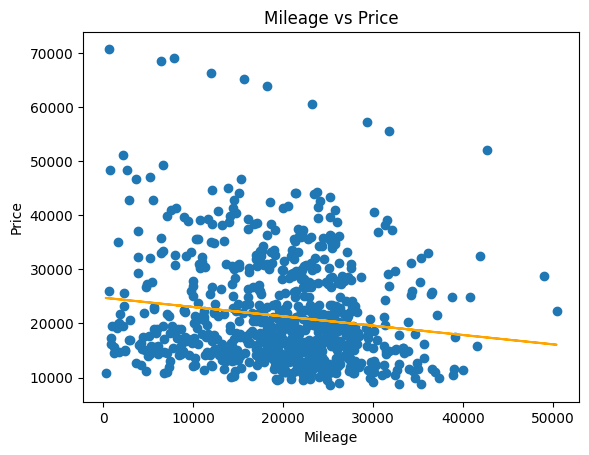

In [19]:
plt.scatter(car_mileage, car_price)
plt.plot(car_mileage , cons_mil, c = 'orange')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')
plt.show

3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [20]:
r_sq = reg_model.score(car_mileage,car_price)
if r_sq > 0.8:
    print('This equation is a good fit')
else:
    print('This equation is not a good fit')


This equation is not a good fit


# Tasks, Part 2

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

In [21]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [15]:
features = ['Mileage' , 'Cylinder' , 'Liter' , 'Doors', 'Cruise' , 'Sound', 'Leather']
car_features = df[features]
car_features.head(3)


,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,8221,6,3.1,4,1,1,1
1,9135,6,3.1,4,1,1,0
2,13196,6,3.1,4,1,1,0


In [16]:
car_price = df['Price']
car_price.head(3)

0    17314.103129
1    17542.036083
2    16218.847862
Name: Price, dtype: float64

In [18]:
reg_model_ft = linear_model.LinearRegression()

In [19]:
reg_model_ft.fit(car_features,car_price)

LinearRegression()

In [20]:
reg_model_ft.coef_

array([-1.69747832e-01,  3.79237893e+03, -7.87220732e+02, -1.54274585e+03,
        6.28899715e+03, -1.99379528e+03,  3.34936162e+03])

In [21]:
reg_model_ft.intercept_

6758.755143598111

In [22]:
reg_model_ft.score(car_features, car_price)

0.4462643536728379

In [54]:
print(f'The Linear regression equation mileage, cylinders, liters, doors, cruise, sound, and leather vs price is : eqn = {reg_model_ft.coef_[0]:.4f}*x + {reg_model_ft.intercept_:.4f}')

The Linear regression equation mileage, cylinders, liters, doors, cruise, sound, and leather vs price is : eqn = -0.1697*x + 6758.7551


In [24]:
r_sq_ft = reg_model_ft.score(car_features,car_price)
if r_sq_ft > 0.8:
    print('This equation is a good fit')
else:
    print('This equation is not a good fit')

This equation is not a good fit
